<a href="https://colab.research.google.com/github/tom-sb/anemEye/blob/main/firstTry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import LabelBinarizer

In [ ]:
print("Loaded all libraries")

Loaded all libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#print(os.listdir('drive/MyDrive/PYconjuntiva'))

fpath = 'drive/MyDrive/PYconjuntiva/'
random_seed = 42
22222222222222222222222222222222222
categoria = os.listdir(fpath)
categories = categoria[:2]
RTcategories = categoria[2:]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))
print("List of categories = ",RTcategories,"\n\nNo. of categories = ", len(RTcategories))


List of categories =  ['normal', 'anemia'] 

No. of categories =  2
List of categories =  ['anemia_test', 'normal_test'] 

No. of categories =  2


In [ ]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_array = Image.fromarray(img, 'RGB')
            resized_img = img_array.resize((227, 227))
            img_lst.append(np.array(resized_img))
            labels.append(index)
    return img_lst, labels

In [ ]:
images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

RTimages, RTlabels = load_images_and_labels(RTcategories)
print("No. of images loaded = ",len(RTimages),"\nNo. of labels loaded = ",len(RTlabels))
print(type(RTimages),type(RTlabels))

No. of images loaded =  288 
No. of labels loaded =  288
<class 'list'> <class 'list'>
No. of images loaded =  18 
No. of labels loaded =  18
<class 'list'> <class 'list'>


In [ ]:
images = np.array(images)
labels = np.array(labels)

RTimages = np.array(RTimages)
RTlabels = np.array(RTlabels)

In [ ]:
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (288, 227, 227, 3) 
Labels shape =  (288,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0
    for i in range(9):
        n += 1
        r = np.random.randint(0 , images.shape[0] , 1)
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        plt.title('AnemiaDx : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

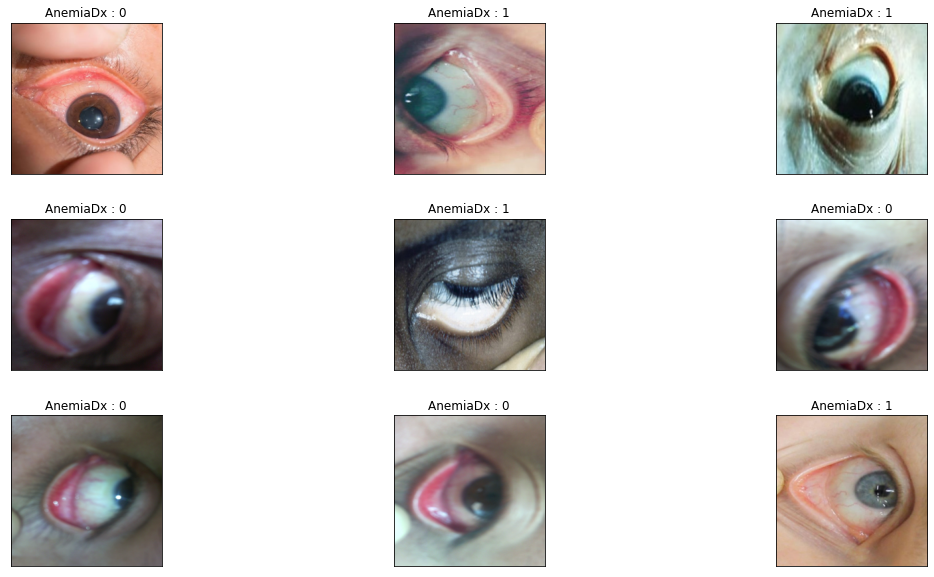

In [ ]:
display_rand_images(images, labels)

-step in data shuffling

et equally spaced numbers in a given range

In [ ]:
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

huffle all the equally spaced values in list 'n'

In [ ]:
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)


'n' values after shuffling =  [ 45 157 256  42 181   9  46 172  77 195 222  33 116 279  56 216   5 224
 237  75 267  84 113 286  73 250 140 147 111  60 101 185 154 236 183 168
 231 143 202 117 165 254 155 132  30  22  24 158 144 167 239 253  97 207
 173 179 277   6  93  66  63  79  25 194 146 255  19 280  92  15  10 206
  68 108  37  16 213 274 260  67  82 118 209 109 204  90  18 232  86 223
 244 112 285 186  55 124 228  38 175 119  57 114 276 272 238  31 266  78
 203 177 225 261  96 265 125 192 126 176  69 271   2 104  76 115 164 139
 159 120 221 242 127  74  29 259 218 107 137 148 227 170 196  65 178  85
 193  12  35  28 142 229 152  51  95 283 200  41 246 197 136  26 281 141
 180   0 258 100 268 230  98  36  61 150 212 182 219  11 284 273  27 210
   4 122  32 184 162 208 233 138  62 135 128 278 247  70 251  64  44 211
 156  40 123 240 153  23 245 248  81  39 215 234 199  14  47  94 249 263
 201 161  43 217 145 190 220 226   3 105  53 133   1 269 103  49 163  80
 205  34 262   7 171

-step in data shuffling

huffle images and corresponding labels data in both the lists

In [ ]:
images = images[n]
labels = labels[n]

In [ ]:
print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (288, 227, 227, 3) 
Labels shape after shuffling =  (288,)


In [ ]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

RTimages = RTimages.astype(np.float32)
RTlabels = RTlabels.astype(np.int32)
RTimages = RTimages/255
print("Images shape after normalization = ",RTimages.shape)

Images shape after normalization =  (288, 227, 227, 3)
Images shape after normalization =  (18, 227, 227, 3)


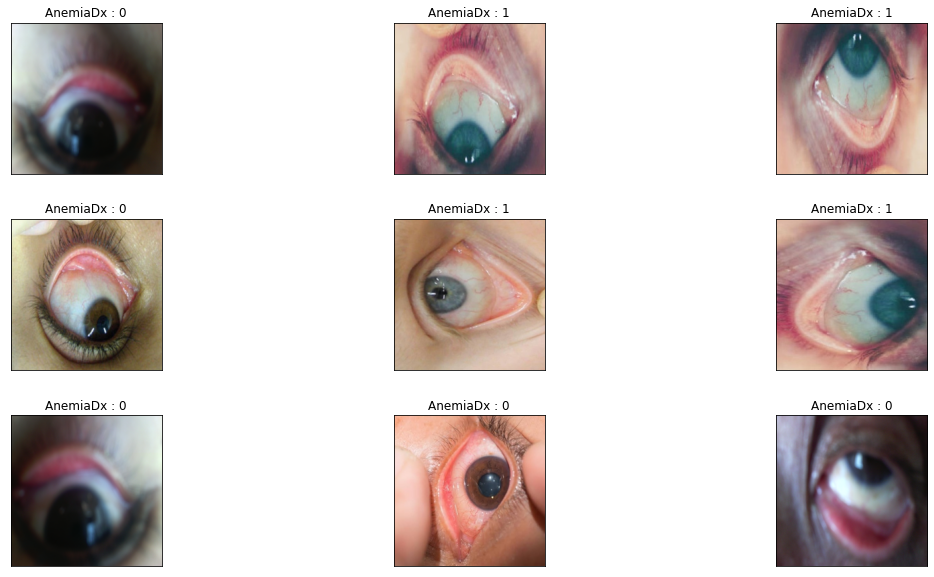

In [ ]:
display_rand_images(images, labels)

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
RTlabels = lb.fit_transform(RTlabels)

#print(labels)
(x_train, x_test, y_train, y_test) = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

trainAug = ImageDataGenerator(
		zoom_range=0.15,
		fill_mode="nearest")

testAug = ImageDataGenerator()
#epochs = 50
#b_size = 32

x_train shape =  (230, 227, 227, 3)
y_train shape =  (230, 1)

x_test shape =  (58, 227, 227, 3)
y_test shape =  (58, 1)


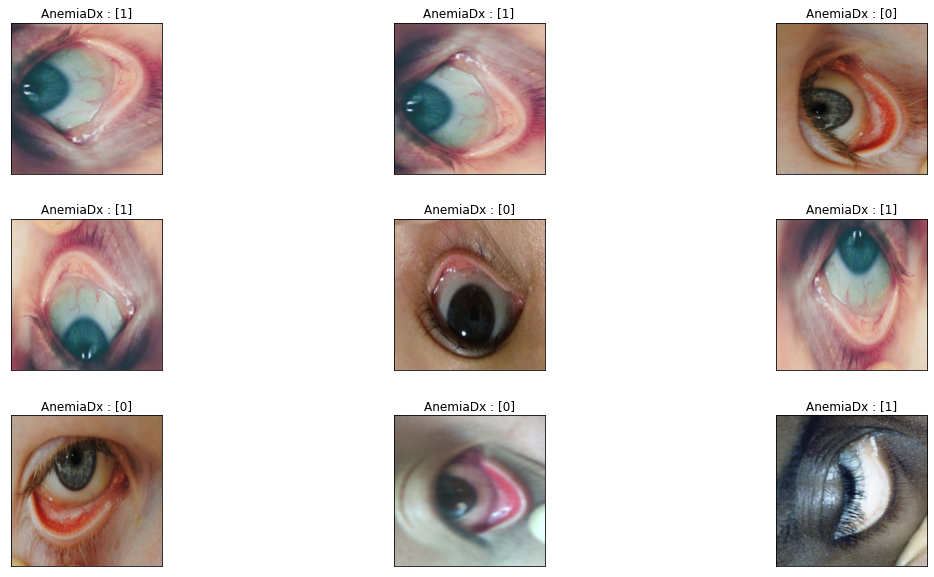

In [ ]:
display_rand_images(x_train, y_train)

############################################<br>
odelo

In [ ]:
model=Sequential()

 conv layer

In [ ]:
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

 max pool layer

In [ ]:
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

In [ ]:
model.add(BatchNormalization())

 conv layer

In [ ]:
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

 max pool layer

In [ ]:
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

In [ ]:
model.add(BatchNormalization())

 conv layer

In [ ]:
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

 conv layer

In [ ]:
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

 conv layer

In [ ]:
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

 max pool layer

In [ ]:
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Flatten())

 dense layer

In [ ]:
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
model.add(BatchNormalization())

 dense layer

In [ ]:
model.add(Dense(4096,activation="relu"))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
model.add(BatchNormalization())

 dense layer

In [ ]:
model.add(Dense(1000,activation="relu"))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
model.add(BatchNormalization())

utput layer

In [ ]:
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

###############################################################

In [ ]:
model.compile(optimizer="Nadam", loss="binary_crossentropy", metrics=["accuracy"])

################################################################

In [ ]:
rpta = model.fit(x_train, y_train, epochs=200,validation_data=(x_test, y_test))
"""
rpta = model.fit(
    x_train,
    y_train,
    batch_size=b_size,
    validation_data=testAug.flow(x_test, y_test),
    epochs=epochs)
"""

Epoch 1/200
8/8 [==============================] - 22s 252ms/step - loss: 1.2522 - accuracy: 0.6155 - val_loss: 2.7776 - val_accuracy: 0.3793
Epoch 2/200
8/8 [==============================] - 0s 55ms/step - loss: 1.2546 - accuracy: 0.6506 - val_loss: 0.8348 - val_accuracy: 0.6207
Epoch 3/200
8/8 [==============================] - 0s 54ms/step - loss: 0.7423 - accuracy: 0.7369 - val_loss: 6.9603 - val_accuracy: 0.3793
Epoch 4/200
8/8 [==============================] - 0s 53ms/step - loss: 0.5005 - accuracy: 0.8021 - val_loss: 4.8071 - val_accuracy: 0.6207
Epoch 5/200
8/8 [==============================] - 0s 54ms/step - loss: 0.5091 - accuracy: 0.8261 - val_loss: 1.3223 - val_accuracy: 0.5690
Epoch 6/200
8/8 [==============================] - 0s 54ms/step - loss: 0.6097 - accuracy: 0.7448 - val_loss: 2.4362 - val_accuracy: 0.5517
Epoch 7/200
8/8 [==============================] - 0s 55ms/step - loss: 0.4672 - accuracy: 0.8041 - val_loss: 3.4941 - val_accuracy: 0.4483
Epoch 8/200
8/8 [=

'\nrpta = model.fit(\n    x_train,\n    y_train,\n    batch_size=b_size,\n    validation_data=testAug.flow(x_test, y_test),\n    epochs=epochs)\n'

##############################################################

In [ ]:
pred = model.predict(x_test)

evaluate = model.evaluate(x_test, y_test)
print ("Loss = " + str(evaluate[0]))
print ("Test Accuracy = " + str(evaluate[1]))

2/2 [==============================] - 0s 20ms/step - loss: 2.1876 - accuracy: 0.7069
Loss = 2.1876447200775146
Test Accuracy = 0.7068965435028076


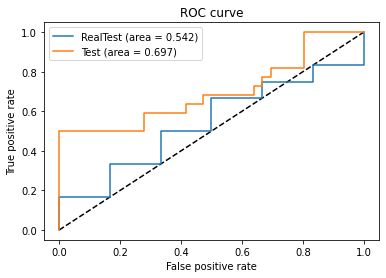

"\nplt.figure(2)\nplt.xlim(0, 0.2)\nplt.ylim(0.8, 1)\nplt.plot([0, 1], [0, 1], 'k--')\nplt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))\n#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))\nplt.xlabel('False positive rate')\nplt.ylabel('True positive rate')\nplt.title('ROC curve (zoomed in at top left)')\nplt.legend(loc='best')\nplt.show()\n"

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#print(x_test)
#print(len(RTimages))
#print(RTlabels)
y_pred_keras = model.predict(RTimages).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(RTlabels, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

y_pred_keras2 = model.predict(x_test).ravel()
fpr_keras2, tpr_keras2, thresholds_keras = roc_curve(y_test, y_pred_keras2)
auc_keras2 = auc(fpr_keras2, tpr_keras2)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_keras, tpr_keras, label='RealTest (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras2, tpr_keras2, label='Test (area = {:.3f})'.format(auc_keras2))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
"""
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()
"""

[INFO] evaluating Validation Set...



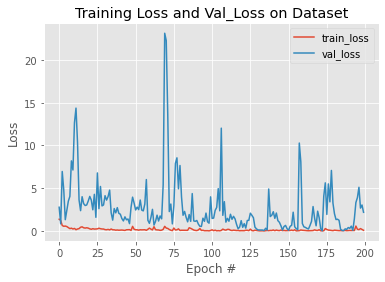

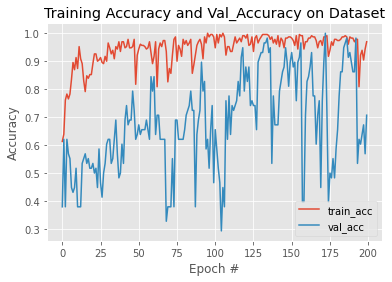

In [ ]:
from sklearn.metrics import classification_report

print("[INFO] evaluating Validation Set...\n")
predictions = model.predict(x=x_test.astype("float32"), batch_size=32)

#print(classification_report(y_test.argmax(axis=0), predictions.argmax(axis=1), target_names=lb.classes_))

#print('Confusion Matrix')
#cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lb.classes_)
#disp = disp.plot(include_values=True, cmap=plt.cm.Blues, ax=None, xticks_rotation='horizontal')

#plt.tick_params(axis=u'both', which=u'both',length=0)
#plt.grid(b=None)

# plot training loss
epochs=200
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), rpta.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), rpta.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Val_Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.savefig("plotloss.png")

# plot training accuracy
N = epochs
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), rpta.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), rpta.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy and Val_Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.savefig("plotaccu.png")

In [ ]:
pred.shape

#############################################################

In [ ]:
plt.figure(1 , figsize = (19 , 10))
n = 0

<Figure size 1368x720 with 0 Axes>

IndexError: ignored

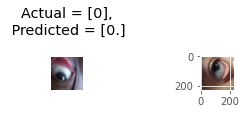

In [ ]:
for i in range(9):
    n += 1
    r = np.random.randint( 0, x_test.shape[0], 1)
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 3.5)
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {},\n Predicted = {}\n'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

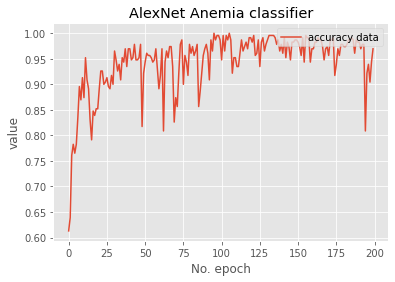

In [ ]:
#plt.plot(rpta.history['loss'], label='loss function')
plt.plot(rpta.history['accuracy'], label='accuracy data')
plt.title('AlexNet Anemia classifier')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

#########################################################